In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 讀取乾淨數據
df = pd.read_csv('../data/processed/steam_cleaned.csv')

# 轉換日期 
df['release_date'] = pd.to_datetime(df['release_date_parsed'])
df['release_year'] = df['release_year'].astype('Int64') 

# 3. 簡單檢查
print(f"樣本數: {len(df)} 款遊戲")
print("資料欄位:", df.columns.tolist())


樣本數: 82201 款遊戲
資料欄位: ['steam_appid', 'name', 'developers', 'publishers', 'release_date', 'required_age', 'platforms', 'metacritic', 'genres', 'recommendations', 'supported_languages', 'achievements', 'categories', 'is_free', 'positive', 'negative', 'owners', 'ccu', 'average_forever', 'median_forever', 'average_2weeks', 'median_2weeks', 'price', 'initialprice', 'discount', 'metacritic_score', 'recommendations_count', 'achievements_count', 'release_date_clean', 'release_date_parsed', 'release_year', 'price_clean', 'owners_avg', 'total_reviews', 'review_score']


C:\Users\user\AppData\Local\Temp\ipykernel_31088\3106155878.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/steam_cleaned.csv')


In [2]:
# 設定 Seaborn 風格
sns.set_theme(style="white", context="talk") 

# 定義一組色票 (深藍、鐵灰、亮藍)
steam_palette = ["#1b2838", "#2a475e", "#66c0f4", "#c7d5e0", "#171a21"]
sns.set_palette(sns.color_palette(steam_palette))

# 解決中文亂碼
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Microsoft JhengHei', 'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 前五名「最多評論」的遊戲

In [3]:

display(df.sort_values('total_reviews', ascending=False)[['name', 'price_clean', 'total_reviews', 'review_score']].head(5))

,name,price_clean,total_reviews,review_score
24,Counter-Strike 2,0.00,8815087,0.866932
13325,PUBG: BATTLEGROUNDS,0.00,2557944,0.594406
2768,Grand Theft Auto V Legacy,0.00,1990556,0.874118
1265,Terraria,4.99,1409473,0.974818
5599,Tom Clancy's Rainbow Six® Siege X,19.99,1398584,0.838601


# Steam 遊戲市場數據分析報告
## 專案背景與目標
本專案分析 Steam 平台歷年來的遊戲數據，透過超過 30 個特徵欄位（如價格、銷量、類型、評價等），挖掘出遊戲市場的商業洞察。
**分析目標：**
1. 觀察 Steam 平台的市場成長趨勢。
2. 分析不同遊戲類型的市場佔比與競爭狀況。
3. 探討定價策略對銷量與評價的影響。
4. 識別出一款成功遊戲的關鍵特徵。

## 市場爆發期
透過面積圖觀察每年遊戲發行量的變化。我們可以看到 Steam Greenlight 實施後，市場出現了結構性的改變。

### Steam Greenlight
Steam 讓獨立遊戲的製作者們能夠提供相關資訊、影片、遊戲擷圖與遊戲測試版本的開發者社群平台，再藉由 Steam 本身龐大的社群使用者來票選評價，如果順利通過即可於 Steam 平台發行遊戲。

### 觀察年份分佈

In [4]:
# 統計每年的遊戲數量，並按照年份排序
yearly_stats = df['release_year'].value_counts().sort_index()

# 印出頭尾觀察
print("--- 最早的 10 個年份 ---")
print(yearly_stats.head(10))

print("\n--- 最近的 10 個年份 ---")
print(yearly_stats.tail(10))

# 長條圖全覽 
fig = px.bar(x=yearly_stats.index, y=yearly_stats.values, 
             title="原始資料年份分佈 (Raw Distribution)",
             labels={'x': 'Year', 'y': 'Count'})
fig.show()

--- 最早的 10 個年份 ---
release_year
1969    1
1997    1
1998    1
1999    3
2000    2
2001    4
2002    1
2003    3
2004    4
2005    6
Name: count, dtype: Int64

--- 最近的 10 個年份 ---
release_year
2017     5889
2018     7405
2019     6757
2020     8047
2021     8329
2022     8363
2023     9286
2024    11808
2025     5458
2029        1
Name: count, dtype: Int64


### 決策與過濾
 1. 起始年：觀察圖表，2006 年之前每年不到 50 款，波動太大，設 2006 為分析起點。
 2. 結束年：目前是 2025，2025年份數據不全，應剔除。

In [5]:
START_YEAR = 2006
END_YEAR = 2024

print(f"決定分析區間：{START_YEAR} - {END_YEAR}")

# 建立過濾後的 DataFrame
df_trend = df[(df['release_year'] >= START_YEAR) & (df['release_year'] <= END_YEAR)].copy()

決定分析區間：2006 - 2024


In [6]:

# 重新計算過濾後的每年數量
trend_data = df_trend['release_year'].value_counts().sort_index().reset_index()
trend_data.columns = ['Year', 'Count']

# 使用 Plotly 畫面積圖
fig = px.area(trend_data, x='Year', y='Count',
              title='Steam 遊戲年度發行趨勢 (2006-2024)',
              markers=True,
              color_discrete_sequence=['#66c0f4']) 
fig.update_traces(
    line=dict(color='#1b2838', width=3),  
    marker=dict(size=6, color='#1b2838', symbol='circle'), #
    fillcolor='rgba(102, 192, 244, 0.3)'  
)
# 加入重要事件標註
fig.add_annotation(
    x=2012,
    y=trend_data.loc[trend_data['Year'] == 2012, 'Count'].values[0],
    text="2012: Steam Greenlight",
    showarrow=True,
    arrowhead=1,
    arrowcolor='#d32f2f',
    font=dict(color='#d32f2f', size=12),
    bgcolor='rgba(255,255,255,0.9)'
)


fig.update_layout(hovermode="x unified") # 滑鼠移動時顯示 X 軸資訊
fig.show()

## 類型解析

透過上下並排的視覺化分析，可以從不同維度解讀市場：

1.  **上側 (數量排行)**：
    *   **Indie (獨立遊戲)** 的數量優勢非常驚人，達到了 5.8 萬款，幾乎是第二名 **Action (動作)** 的 1.6 倍。這證實了 Steam 是一個高度去中心化、由獨立創作者支撐的平台。
    *   **休閒 (Casual)** 與 **冒險 (Adventure)** 緊追在後，顯示輕度玩家與劇情向玩家是主要受眾。

2.  **下側 (結構佔比)**：
    *   前 15 大類型中，Indie 佔據了約 **19%** 的份額。
    *    **Simulation (模擬)** 和 **Strategy (策略)** 合計佔比超過 10%，這類遊戲雖然開發門檻較高，但擁有穩定的客群。

### 資料清洗與前處理

In [7]:
# 確保 genres 欄位是字串，排除空值
df_genres = df.dropna(subset=['genres']).copy()

# 字串切割：將 "Action, Indie" 變成列表 ['Action', 'Indie']
df_genres['genre_list'] = df_genres['genres'].str.split(', ')

# 一行變多行，讓每個類型都能被獨立計算
df_exploded = df_genres.explode('genre_list')

### 統計分析 

In [8]:

# 計算每個類型的出現次數
genre_counts = df_exploded['genre_list'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# 計算市場佔比
total_tags = genre_counts['Count'].sum()
genre_counts['Percentage'] = (genre_counts['Count'] / total_tags) * 100

# 只取前 15 名進行視覺化
top_15_genres = genre_counts.head(15).copy()

#  預覽數據
print(f" {len(genre_counts)} 種不同的遊戲類型標籤。")
print("前 5 大熱門類型：")
display(top_15_genres.head(5))

 123 種不同的遊戲類型標籤。
前 5 大熱門類型：


,Genre,Count,Percentage
0,Indie,58364,24.903886
1,Action,35006,14.937040
2,Casual,33412,14.256882
3,Adventure,32751,13.974833
4,Simulation,17036,7.269252


In [ ]:
# 中英對照字典
genre_map = {
    'Indie': '獨立遊戲', 'Action': '動作', 'Casual': '休閒', 'Adventure': '冒險',
    'Simulation': '模擬', 'Strategy': '策略', 'RPG': '角色扮演',
    'Early Access': '搶先體驗', 'Free To Play': '免費遊玩', 'Sports': '體育',
    'Racing': '競速', 'Massively Multiplayer': '大型多人 (MMO)',
    'Utilities': '實用工具', 'Design & Illustration': '設計插畫',
    'Animation & Modeling': '動畫建模', 'Education': '教育'
}

# 建立顯示標籤
top_15_genres['Label'] = top_15_genres['Genre'].apply(lambda x: f"{x} {genre_map.get(x, '')}")

# 建立畫布 (上下 2 列)
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.5, 0.5], 
    specs=[[{"type": "xy"}], [{"type": "domain"}]], # 上面是 XY座標圖，下面是 Domain
    vertical_spacing=0.1, # 上下圖表的間距
    subplot_titles=("Steam 熱門類型排行", "Steam 熱門類型市場佔比")
)

# 上圖：長條圖
fig.add_trace(
    go.Bar(
        x=top_15_genres['Count'],
        y=top_15_genres['Label'],
        orientation='h',
        text=top_15_genres['Count'],
        texttemplate='%{text:,}', # 千分位
        textposition='outside',   # 數字在外面
        marker=dict(
            color=top_15_genres['Count'], # 顏色根據數量變化
            colorscale='Blues',           # 使用藍色漸層
            line=dict(color='rgb(8,48,107)', width=1),
            
            # -Color Bar
            showscale=True, 
            colorbar=dict(
                title="遊戲數量",
                x=1.0,     
                y=0.8,     
                len=0.55  
            )
        ),
        name='數量'
    ),
    row=1, col=1
)

# 下圖：甜甜圈圖 
fig.add_trace(
    go.Pie(
        labels=top_15_genres['Label'],
        values=top_15_genres['Count'],
        hole=0.4, # 甜甜圈
        textinfo='percent+label', # 顯示百分比和標籤
        textposition='inside',    
        marker=dict(
            colors=px.colors.qualitative.Pastel, # 使用不同色系區分
            line=dict(color='#fff', width=1)
        ),
        showlegend=True, # 顯示圖例
        name='佔比'
    ),
    row=2, col=1
)

# 版面美化
fig.update_layout(
    title_text="Steam 遊戲類型分析：排行與佔比",
    title_font_size=24,
    height=1400, 
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family="Arial Unicode MS, Microsoft JhengHei"),
    
    # 圖例設定 
    legend=dict(
        orientation="h", # 水平排列圖例
        yanchor="bottom", y=-0.1, # 放在最下面
        xanchor="center", x=0.5
    )
)

# 上圖的座標軸設定
fig.update_xaxes(title_text="遊戲數量", showgrid=True, gridcolor='lightgray', row=1, col=1)
fig.update_yaxes(autorange="reversed", row=1, col=1)

fig.show()

### 誰主宰了流量？

這張堆疊面積圖展示了 Steam 市場「玩家熱度 (Total Reviews)」的歷史流動：

1.  **Action (動作) 的最高地位**：
    *   觀察最底層的大面積色塊，動作遊戲始終佔據了最大的流量份額。這證明了「爽快感」是玩家最核心的需求。

2.  **Indie (獨立遊戲) 的崛起**：
    *   注意看代表獨立遊戲的色塊（通常在中間層）。在 2012 年之前，它的佔比很小；但在 2014-2016 年後開始大幅擴張，顯示 Steam 已經成功轉型為獨立遊戲的主要舞台。

3.  **疫情紅利 (2020-2021)**：
    *   可以看到在 2020 年附近，整體山峰出現了一個高峰。這是受惠於 COVID-19 疫情，全球玩家在遊戲上的投入時間與互動顯著增加。

4.  **RPG (角色扮演) 與 Strategy (策略) 的穩定性**：
    *   這兩類遊戲雖然沒有爆發性增長，但維持著穩定的厚度，代表擁有一群非常死忠的核心受眾。

In [10]:

# 資料準備
# 分析 'total_reviews' (熱度)，而不是遊戲數量
df_genres = df.dropna(subset=['genres']).assign(genre_list=df['genres'].str.split(', ')).explode('genre_list')

# 取「總評論數」最多的前 8 大類型來畫
top_genre_names = df_genres.groupby('genre_list')['total_reviews'].sum().nlargest(8).index.tolist()

# 篩選資料
df_trend_area = df_genres[
    (df_genres['genre_list'].isin(top_genre_names)) & 
    (df_genres['release_year'] >= 2006) & 
    (df_genres['release_year'] <= 2024)
].copy()

# 每年、每個類型的總評論數
df_trend_grouped = df_trend_area.groupby(['release_year', 'genre_list'])['total_reviews'].sum().reset_index()

# 翻譯與美化
genre_map = {
    'Indie': '獨立遊戲', 'Action': '動作', 'Casual': '休閒', 'Adventure': '冒險',
    'Simulation': '模擬', 'Strategy': '策略', 'RPG': '角色扮演',
    'Early Access': '搶先體驗', 'Free To Play': '免費遊玩', 'Sports': '體育',
    'Racing': '競速', 'Massively Multiplayer': '大型多人 (MMO)',
    'Shooter': '射擊'
}
df_trend_grouped['Genre Label'] = df_trend_grouped['genre_list'].apply(lambda x: genre_map.get(x, x))

# 繪圖
fig = px.area(
    df_trend_grouped, 
    x="release_year", 
    y="total_reviews", 
    color="Genre Label", # 顏色依據類型區分
    
    # 使用鮮豔的配色
    color_discrete_sequence=px.colors.qualitative.Bold, 
    
    title="Steam 遊戲熱度演變：各類型評論數趨勢 (2006-2024)",
    labels={'total_reviews': 'Total Reviews (總評論數)', 'release_year': 'Year', 'Genre Label': '遊戲類型'}
)

# 優化細節
fig.update_layout(
    hovermode="x unified", # 滑鼠移上去時，顯示該年份所有類型的數據
    plot_bgcolor='rgba(245, 245, 245, 0.5)', # 淺灰背景
    xaxis=dict(showgrid=False), # X軸不顯示格線
    yaxis=dict(gridcolor='white'), # Y軸顯示白色格線
    title_font_size=20,
    height=600,
    legend=dict(title="類型 ") 
)

# 讓線條平滑一點
fig.update_traces(line=dict(width=0)) 

fig.show()

### 供給端分析：遊戲發行量

這張圖表展示了 Steam 平台每年「產出」了多少遊戲，反映了開發者的動向：

1.  **Indie (獨立遊戲) 的大爆發**：
    *   圖表中面積最大的區塊。從 2012 年 Steam Greenlight 實施後，獨立遊戲的發行量呈幾何級數增長。這印證了 Steam 已成為全世界最開放的獨立遊戲發行渠道。

2.  **Casual (休閒遊戲) 的氾濫**：
    *   對比上一張「熱度圖」，發現 Casual 遊戲在這裡的面積非常大（發行量很多），但在熱度圖中卻沒那麼顯眼。
    *   代表休閒遊戲市場是典型的**「紅海」**——開發容易、數量極多，但真正能獲得大量玩家關注的成功作品比例較低。

3.  **Action 與 Adventure 的基石作用**：
    *   這兩類遊戲無論在「產量」還是「熱度」上都維持著穩定的高比例，是市場最安全但也最競爭的主流賽道。

**結論**：Steam 市場正面臨「供給過剩」的挑戰。每年有數萬款新遊戲上架，開發者若無法在品質或行銷上突圍，很容易被淹沒在海量的 Casual 與 Indie 遊戲潮之中。

In [11]:
# 資料準備
df_genres = df.dropna(subset=['genres']).assign(genre_list=df['genres'].str.split(', ')).explode('genre_list')
df_trend = df_genres[
    (df_genres['release_year'] >= 2006) & 
    (df_genres['release_year'] <= 2024)
].copy()

# 找出產量最多的前 10 大類型
top_10_genres = df_trend['genre_list'].value_counts().head(10).index.tolist()

df_filtered = df_trend[df_trend['genre_list'].isin(top_10_genres)].copy()

# 每年、每個類型的「發行數量」 (使用 size 計算筆數)
df_grouped = df_filtered.groupby(['release_year', 'genre_list']).size().reset_index(name='game_count')

# 翻譯與排序
# 中英對照
genre_map = {
    'Indie': '獨立遊戲', 'Action': '動作', 'Casual': '休閒', 'Adventure': '冒險',
    'Simulation': '模擬', 'Strategy': '策略', 'RPG': '角色扮演',
    'Early Access': '搶先體驗', 'Free To Play': '免費遊玩', 'Sports': '體育',
    'Racing': '競速', 'Massively Multiplayer': '大型多人', 'Shooter': '射擊'
}
df_grouped['Genre Label'] = df_grouped['genre_list'].apply(lambda x: genre_map.get(x, x))

# 「數量最多」的疊在最下面 算出總量，用來排序圖例
total_counts = df_grouped.groupby('Genre Label')['game_count'].sum().sort_values(ascending=False).index
df_grouped['Genre Label'] = pd.Categorical(df_grouped['Genre Label'], categories=total_counts, ordered=True)
df_grouped = df_grouped.sort_values(['release_year', 'Genre Label'])

# 繪圖 
fig = px.area(
    df_grouped, 
    x="release_year", 
    y="game_count", 
    color="Genre Label", 

    color_discrete_sequence=px.colors.qualitative.Pastel,
    
    title="Steam 遊戲發行量趨勢",
    labels={'game_count': 'Number of Games Released (發行量)', 'release_year': 'Year'}
)

# 優化細節
fig.update_layout(
    hovermode="x unified", # 滑鼠移上去顯示全年份數據
    plot_bgcolor='rgba(240, 245, 250, 0.5)', # 淡藍灰色背景
    
    # 設定 X 軸 (年份)
    xaxis=dict(
        tickmode='linear', 
        dtick=1, 
        showgrid=True, 
        gridcolor='white'
    ),
    
    # 設定 Y 軸
    yaxis=dict(
        showgrid=True, 
        gridcolor='white',
        title_font=dict(size=14)
    ),
    
    title_font_size=20,
    height=650, 
    
    # 圖例設定
    legend=dict(
        title="遊戲類型",
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.02 # 放在圖表外右側
    )
)

fig.update_traces(line=dict(width=0.5)) 

fig.show()

## 價格剖析
### 定價 (Pricing) 決定一款遊戲生死的關鍵：
**市場結構：** Steam 上到底有多少免費遊戲？

**定價甜蜜點：** 付費遊戲通常賣多少錢？

**品質迷思：** 付費遊戲的評價真的比免費遊戲好嗎？

In [12]:
# 查看價格的統計數據
print("--- 價格統計摘要 ---")
print(df['price_clean'].describe(percentiles=[.25, .5, .75, .95, .99]))

--- 價格統計摘要 ---
count    82201.000000
mean         7.573596
std         12.906738
min          0.000000
25%          1.790000
50%          4.990000
75%          9.990000
95%         19.990000
99%         44.990000
max        999.980000
Name: price_clean, dtype: float64


In [13]:
# 找出價格極高的遊戲
print("\n--- 最貴的前 10 款遊戲 ---")
display(df[['name', 'price_clean', 'developers']].sort_values('price_clean', ascending=False).head(10))



--- 最貴的前 10 款遊戲 ---


,name,price_clean,developers
67394,The Leverage Game,999.98,A&S Inc.
35325,Ascent Free-Roaming VR Experience,999.00,Fury VR
75647,True Love,500.00,A Guy
74569,Pyramid Game,484.45,Pyramid Game
32057,Aartform Curvy 3D 4.0,299.99,Aartform Ltd
2315,Aartform Curvy 3D 3.0,299.90,Aartform
10500,Houdini Indie,269.99,SideFX
58371,VEGAS Edit 20 Steam Edition,249.00,MAGIX Software GmbH
8456,3DF Zephyr Lite Steam Edition,249.00,3Dflow SRL
73719,Save and Survive,199.99,Save and Survive


In [14]:
# 資料準備
df_price = df.copy()
df_price['Pricing Model'] = df_price['price_clean'].apply(lambda x: 'Free (免費)' if x == 0 else 'Paid (付費)')
model_counts = df_price['Pricing Model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']

df_paid_dist = df_price[(df_price['price_clean'] > 0) & (df_price['price_clean'] <= 100)]
median_price = df_paid_dist['price_clean'].median()

# 設定配色
color_map = {
    'Paid (付費)': '#2980b9',  
    'Free (免費)': '#ff7675'   
}
# 根據資料順序產生顏色列表
pie_colors = [color_map[m] for m in model_counts['Model']]

# 建立畫布
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.5, 0.5],
    specs=[[{'type': 'domain'}, {'type': 'xy'}]],
    subplot_titles=("市場結構：免費 vs 付費", "付費遊戲定價分佈 (0 - $100)")
)

# 左圖：甜甜圈圖 
fig.add_trace(go.Pie(
    labels=model_counts['Model'],
    values=model_counts['Count'],
    hole=0.5, 
    marker=dict(
        colors=pie_colors, 
        line=dict(color='#ffffff', width=2)
    ),
    textinfo='percent+label',
    hoverinfo='label+value+percent',
    name='佔比'
), row=1, col=1)

# 右圖：價格直方圖
fig.add_trace(go.Histogram(
    x=df_paid_dist['price_clean'],
    xbins=dict(start=0, end=60, size=2.5),
    marker=dict(
        color='#2980b9',
        line=dict(color='white', width=1),
        opacity=0.85
    ),
    name='遊戲數量'
), row=1, col=2)

# 加入垂直線 (shape)，並以 xref='x'、yref='paper' 鎖定右側 XY 子圖的 x 軸範圍
fig.add_shape(
    type='line',
    x0=median_price, x1=median_price,
    y0=0, y1=1,
    xref='x', yref='paper',
    line=dict(width=2, dash='dot', color='#2c3e50')
)

# 加上標註（annotation），置於圖上方
fig.add_annotation(
    x=median_price,
    y=1.02,
    xref='x',
    yref='paper',
    text=f"中位數: ${median_price}",
    showarrow=False,
    font=dict(color="#2c3e50", size=12)
)

# 整體美化 
fig.update_layout(
    title_text="Steam 定價策略分析：市場結構與價格分佈",
    title_font_size=24,
    height=550,
    plot_bgcolor='rgba(240, 242, 245, 0.5)',
    font=dict(family="Arial Unicode MS, Microsoft JhengHei"),
    showlegend=False
)

# 座標軸優化
fig.update_xaxes(title_text="價格 (USD)", showgrid=True, gridcolor='white', row=1, col=2)
fig.update_yaxes(title_text="遊戲數量", showgrid=True, gridcolor='white', row=1, col=2)

fig.show()

### 品質與評價洞察

透過箱型圖比較，發現了有趣的現象：

1.  **付費遊戲的評價較穩定**：
    *   **Paid (付費)** 遊戲的好評率中位數通常**高於**免費遊戲。
    *   這可能是因為玩家花了錢，會傾向更認真體驗遊戲；另一方面，免費遊戲容易因為微小的缺點（如內購、廣告）而被隨意刷負評。

2.  **免費遊戲的上下限極大**：
    *   免費遊戲的箱體（Box）較長，代表品質參差不齊。Steam 上既有像 *Dota 2* 這樣的頂級神作，也有大量充斥廣告的劣質遊戲。

**結論**：若開發者對自己的遊戲品質有信心，採用**付費買斷制**通常能獲得更客觀、甚至較高的玩家評價基數。

In [15]:
# 資料篩選
# 只選有一定評論數的遊戲，避免數據偏差
df_quality = df[df['total_reviews'] > 10000].copy()
df_quality['Pricing Model'] = df_quality['price_clean'].apply(lambda x: 'Free (免費)' if x == 0 else 'Paid (付費)')

# 繪製箱型圖 
fig = px.box(
    df_quality, 
    x="Pricing Model", 
    y="review_score", 
    color="Pricing Model",
    color_discrete_map={'Free (免費)': '#e74c3c', 'Paid (付費)': '#3498db'},
    points=False, # 不顯示所有散點，保持版面乾淨
    notched=True, # 顯示缺口，方便比較中位數差異
    title="品質對決：免費 vs 付費遊戲的好評率比較 (評論數 > 10000)",
    labels={'review_score': 'Positive Review Rate (好評率)', 'Pricing Model': '商業模式'}
)

# 美化 
fig.update_layout(
    height=500,
    width=800, 
    plot_bgcolor='rgba(245,245,245,0.5)',
    yaxis=dict(tickformat=".0%", gridcolor='white'), # Y軸顯示百分比
    font=dict(family="Arial Unicode MS, Microsoft JhengHei"),
    showlegend=False
)

fig.show()

## 價格甜蜜點：高價遊戲真的比較好玩嗎？
透過六角蜂巢圖 (Hexbin Plot) 觀察價格與好評率的密度分佈。顏色越深代表該區間的遊戲數量越多。
### 從圖中得到的重點結論
多數商品集中在低到中價位（左側密度最高）。
正面評價多落在 0.7～0.9，平均約 0.79。
價格高，不一定評價更好；
低價商品同樣可以有高評價。
高價區資料較少但有一定評價
最密集區：偏低價格 + 偏高評價，表示「高 CP 值」商品很多。

**總結:**
價格高低不保證評價好壞，多數高評價商品其實集中在較低價格區間。

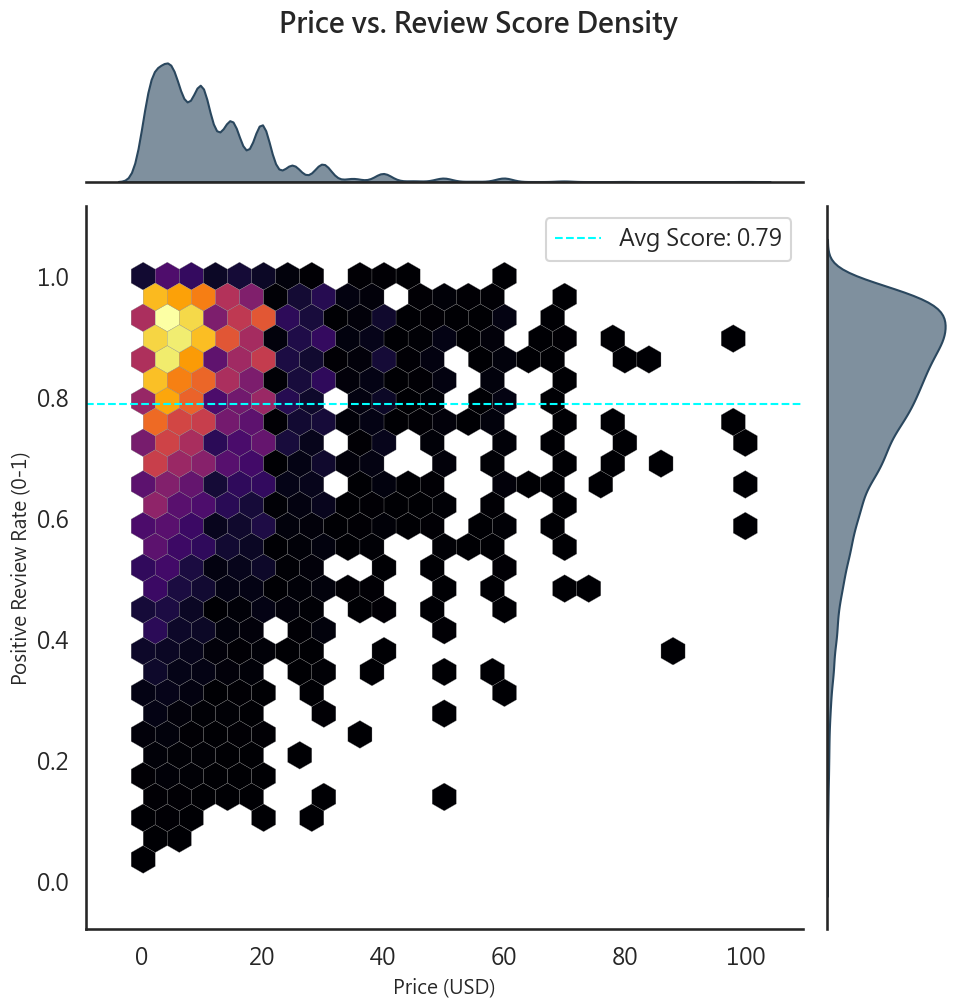

In [16]:
# 資料準備：過濾掉極端值，專注於大眾市場 ($0 - $100)
df_price_score = df[(df['price_clean'] <= 100) & (df['price_clean'] > 0) & (df['total_reviews'] > 50)]

#  繪圖 (使用 JointGrid 組合圖)
g = sns.JointGrid(x="price_clean", y="review_score", data=df_price_score, height=10, ratio=5)

#  中間主圖：六角蜂巢圖 (Hexbin)
g.plot_joint(plt.hexbin, gridsize=25, cmap='inferno', mincnt=1, edgecolors='gray', linewidths=0.2)

# 旁邊的邊際圖：KDE 密度圖
g.plot_marginals(sns.kdeplot, fill=True, color="#2a475e", alpha=0.6)

# 美化與標註
g.set_axis_labels("Price (USD)", "Positive Review Rate (0-1)", fontsize=14)
g.fig.suptitle("Price vs. Review Score Density", fontsize=20, fontweight='bold', y=1.02)

# 參考線：平均好評率
mean_score = df_price_score['review_score'].mean()
g.ax_joint.axhline(mean_score, color='cyan', linestyle='--', linewidth=1.5, label=f'Avg Score: {mean_score:.2f}')
g.ax_joint.legend()

plt.show()

In [17]:
# 準備資料：取玩家夠多且價格合理的遊戲
df_bubble = df[
    (df['owners_avg'] > 1000000) & 
    (df['price_clean'] < 70) &
    (df['release_year'] >= 2020) # 只看 2020 之後的新遊戲
].copy()

# 取出主要類型用於上色
df_bubble['main_genre'] = df_bubble['genres'].astype(str).apply(lambda x: x.split(', ')[0])
# 只保留前 5 大類型
top_5_genres = df_bubble['main_genre'].value_counts().head(5).index
df_bubble = df_bubble[df_bubble['main_genre'].isin(top_5_genres)]

# 繪圖
fig = px.scatter(df_bubble, 
                 x="price_clean", 
                 y="review_score",
                 size="owners_avg", # 氣泡大小代表熱門度
                 color="main_genre",   # 顏色代表類型
                 hover_name="name",    # 滑鼠移上去顯示遊戲名稱
                 log_x=False, 
                 size_max=60,
                 title="2020年後熱門遊戲分析：價格 vs 評價 vs 熱度",
                 labels={'price_clean': 'Price ($)', 'review_score': 'Positive Review Rate'},
                 ) 

fig.show()

## 全球化與玩家黏著度分析
1. 在地化策略：支援繁體中文重要嗎？支援越多語言的遊戲賣得越好嗎？
2. 受眾分級：Steam 是成人遊戲的天下，還是全年齡向為主？
3. 黏著度設計：成就系統跟多人連線模式，真的能讓玩家玩更久嗎？

### 語言與年齡分級分析

1.  **語言**：英語 是絕對的通用語。
3.  **全年齡為主**：儘管 Steam 常被認為有很多成人內容，但數據顯示 **90% 左右** 的遊戲標記為「0歲 (全年齡)」。真正的 18禁 遊戲雖然話題性高，但在數量上仍屬小眾。

In [18]:
# 資料準備與清洗
df_eng = df.copy()

# 取得語言欄位
langs_series = df_eng['supported_languages'].astype(str)

# 清洗步驟

# 把說明文字刪掉 (不分大小寫，不管中間有幾個空白)
langs_series = langs_series.str.replace(r'languages\s+with\s+full\s+audio\s+support', '', case=False, regex=True)

# 移除 HTML 標籤，並用「空白」取代 (避免 "English<br>French" 變成 "EnglishFrench")
langs_series = langs_series.str.replace(r'<[^>]+>', ' ', regex=True)

# 移除星號 (*)
langs_series = langs_series.str.replace('*', '', regex=False)

# 移除可能殘留的括號內容 (有些資料會有 (text only))
langs_series = langs_series.str.replace(r'\(.*?\)', '', regex=True)

# 用逗號切割
all_langs = langs_series.str.split(',').explode()

# 去除前後空白
all_langs = all_langs.str.strip()

# 最後過濾
# 刪除空字串
all_langs = all_langs[all_langs != '']
# 確認長度 
all_langs = all_langs[all_langs.str.len() < 30]

# 統計 Top 20
top_20_langs = all_langs.value_counts().head(20).sort_values(ascending=True) # 為了畫橫條圖從小排到大

# 資料準備：年齡分級
# 0 代表全年齡，17/18 代表成人
age_counts = df_eng['required_age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']
def clean_age_label(age):
    if age == 0: return "全年齡 (All Ages)"
    if age >= 17: return "成人 (17+)"
    return "輔導級 (Other)"
age_counts['Label'] = age_counts['Age'].apply(clean_age_label)
age_final = age_counts.groupby('Label')['Count'].sum().reset_index()

# 繪圖
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.7, 0.3],
    specs=[[{'type': 'xy'}, {'type': 'domain'}]],
    subplot_titles=("Steam 支援語言 Top 20", "遊戲年齡分級佔比")
)

# 左圖：語言排行
fig.add_trace(go.Bar(
    x=top_20_langs.values,
    y=top_20_langs.index,
    orientation='h',
    marker=dict(color=top_20_langs.values, colorscale='Teal'),
    text=top_20_langs.values, texttemplate='%{text:,}', textposition='outside',
    name='遊戲數'
), row=1, col=1)

# 右圖：年齡分級
fig.add_trace(go.Pie(
    labels=age_final['Label'],
    values=age_final['Count'],
    hole=0.4,
    marker=dict(colors=['#2ecc71', '#e74c3c', '#f1c40f']), # 綠(全齡), 紅(成人), 黃(其他)
    textinfo='percent+label',
    name='佔比'
), row=1, col=2)

# 美化
fig.update_layout(
    title_text="全球化與受眾分析：語言與分級",
    title_font_size=24,
    height=500,
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False
)
fig.show()
# 標記是否支援繁體中文 (Traditional Chinese)
df_eng['has_tchinese'] = df_eng['supported_languages'].astype(str).str.contains('Traditional Chinese', case=False)
print(f"支援繁體中文的遊戲比例: {df_eng['has_tchinese'].mean():.1%}")

支援繁體中文的遊戲比例: 13.7%


### 在地化策略的商業價值

對數據進行了挖掘，得出了關於語言策略的關鍵洞察：

#### 支援越多語言，賣得越好嗎？ (Left Chart)
*   **答案：是的。**
*   **關鍵轉折點**：
    *   從左圖可以看到，當一款遊戲支援 **7 種以上語言** 時，其銷量中位數出現了顯著的爬升。
    *   支援 17 種以上語言的遊戲，通常對應的是大型專案（AA/AAA），其銷量基數遠高於僅支援 1-2 種語言的小型遊戲。
*   **因果關係提醒**：這不代表「隨便翻譯就能大賣」，而是「有潛力大賣的遊戲，通常預算充足，會做全球化佈局」。這是一個**正向循環**。

#### 2. 繁體中文重要嗎？ (Right Chart)
*   **答案：重要。但雙中更重要'**
*   **雙中策略的優勢**：
    *   觀察右側箱型圖，採用 **「雙中策略 (簡中 + 繁中)」** 的遊戲，其好評率中位數顯著高於「無中文」的遊戲。
*   **玩家心理分析**：
    *   僅支援簡中雖然能覆蓋最大市場，但容易讓繁體中文使用者感到被忽視，甚至出現「負評抗議」。
    *   同時支援繁簡中文，傳達了開發者對華語社群的**全面尊重**，這通常會轉化為更高的評價與社群黏著度。


In [19]:
# 資料準備
df_lang_analysis = df.copy()

# 計算語言數量
clean_langs = df_lang_analysis['supported_languages'].astype(str).str.replace(r'<[^>]+>', '', regex=True)
df_lang_analysis['lang_count'] = clean_langs.apply(lambda x: len(x.split(',')))

# 定義中文策略
def get_chinese_strategy(text):
    text = str(text)
    has_sc = 'Simplified Chinese' in text
    has_tc = 'Traditional Chinese' in text
    if has_sc and has_tc: return '雙中策略 (簡+繁)'
    elif has_sc: return '僅簡中'
    elif has_tc: return '僅繁中'
    else: return '無中文'

df_lang_analysis['chinese_strategy'] = df_lang_analysis['supported_languages'].apply(get_chinese_strategy)
df_active = df_lang_analysis[df_lang_analysis['total_reviews'] > 50].copy()

# 建立畫布
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.5, 0.5],
    subplot_titles=("多語言效應：語言數 vs 銷量", "繁中重要嗎？中文策略的好評率比較"),
    horizontal_spacing=0.12
)

# 左圖：語言數量 vs 銷量
lang_sales = df_active.groupby('lang_count')['owners_avg'].median().reset_index()
lang_sales = lang_sales[lang_sales['lang_count'] <= 20]

fig.add_trace(go.Scatter(
    x=lang_sales['lang_count'],
    y=lang_sales['owners_avg'],
    mode='lines+markers',
    marker=dict(size=8, color='#3498db'),
    line=dict(width=3, color='#3498db'),
    name='銷量中位數'
), row=1, col=1)

# 右圖：中文策略
order_list = ['無中文', '僅簡中', '雙中策略 (簡+繁)', '僅繁中']

# 算出「雙中策略」的中位數
target_median = df_active[df_active['chinese_strategy'] == '雙中策略 (簡+繁)']['review_score'].median()

for strategy in order_list:
    subset = df_active[df_active['chinese_strategy'] == strategy]
    if len(subset) > 0:
        fig.add_trace(go.Box(
            y=subset['review_score'],
            name=strategy,
            # 雙中用紅色，其他用灰色，對比
            marker_color='#e74c3c' if '雙中' in strategy else '#95a5a6', 
            boxpoints=False,
            notched=True
        ), row=1, col=2)

# 右圖畫上中位數基準線
fig.add_hline(
    y=target_median,
    line_dash="dot",       # 虛線
    line_width=2,
    line_color="#c0392b",  # 深紅色
    row=1, col=2,
    annotation_text=f"雙中中位數: {target_median:.1%}", # 顯示數值
    annotation_position="top right",
    annotation_font=dict(color="#c0392b", size=12)
)

# 美化與註釋
fig.update_layout(
    title_text="在地化策略深度分析：",
    title_font_size=24,
    height=550,
    plot_bgcolor='rgba(240, 242, 245, 0.5)',
    showlegend=False
)

# 左圖設定
fig.update_xaxes(title_text="支援語言數量", row=1, col=1)
fig.update_yaxes(title_text="中位數銷量 (Owners)", row=1, col=1)

# 右圖設定 (強制指定 X 軸順序)
fig.update_xaxes(categoryorder='array', categoryarray=order_list, row=1, col=2)
fig.update_yaxes(title_text="好評率", tickformat=".0%", row=1, col=2)

# 加入轉折點註解
fig.add_annotation(
    x=7, y=lang_sales.loc[lang_sales['lang_count']==7, 'owners_avg'].values[0],
    text="轉折點：7種語言<br>(銷量增加)",
    showarrow=True, arrowhead=1, ax=0, ay=-40,
    row=1, col=1
)

fig.show()

### 「遊戲設計機制 」 如何影響 「玩家留存 」 
社交驅動力：單人 vs. 多人，誰比較殺時間？

目標驅動力：成就系統設得越多，玩家真的會玩越久嗎？

分析了「遊戲模式」與「成就系統」對玩家遊玩時間的影響：

1.  **多人遊戲的社交紅利**：
    *   左圖顯示，**多人連線遊戲**的中位數遊玩時間通常是單人遊戲的 **1.5 倍**。
    *   這證實了「社交連結」是強大的留存工具。朋友在玩，玩家就更難流失。這也是為什麼越來越多單人遊戲嘗試加入 (合作) 模式的原因。

2.  **成就系統的黃金區間**：
    *   **無成就 vs. 有成就**：從「無成就」到「1-10個」，遊玩時間有顯著提升，證明成就能有效引導玩家探索。
    *   **最佳區間**：通常在 **51-80 個成就** 的區間，遊玩時間達到高峰。這代表內容豐富度剛好，玩家有動力去達成全成就 (100% Completion)。
    *   **邊際效應遞減**：當成就數量超過 80+ 甚至更多時，遊玩時間並沒有成比例增加。這顯示單純堆疊成就數量並不能無限提升黏著度，反而可能讓玩家感到疲乏或放棄。

In [20]:
# 資料準備與特徵工程 
df_engage = df.copy()

# 轉換遊玩時間 (分鐘 -> 小時)
df_engage['hours_played'] = df_engage['average_forever'] / 60

df_engage['Game Mode'] = df_engage['categories'].astype(str).apply(
    lambda x: '多人連線 (Multi)' if 'Multi-player' in x or 'Co-op' in x else '單人遊戲 (Single)'
)

# 成就數量分組 
bins = [-1, 0, 10, 30, 50, 80, 100000]
labels = ['無成就', '1-10 (少)', '11-30 (中)', '31-50 (多)', '51-80 (豐富)', '80+ (極多)']
df_engage['Achieve Group'] = pd.cut(df_engage['achievements_count'], bins=bins, labels=labels)

# 嚴格篩選 (只看有一定熱度的遊戲，避免 0 人玩的遊戲干擾)
df_active_engage = df_engage[df_engage['total_reviews'] > 100].copy()

# 計算統計數據 (中位數)

# 左圖數據：單人 vs 多人
mode_stats = df_active_engage.groupby('Game Mode')['hours_played'].median().reset_index()

# 右圖數據：成就數量 vs 時間
ach_stats = df_active_engage.groupby('Achieve Group')['hours_played'].median().reset_index()

# 建立畫布 (左右佈局) 
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("單人 vs 多人遊玩時數", "成就數量對黏著度的影響"),
    horizontal_spacing=0.15
)

# 左圖：單人 vs 多人 (Bar)
fig.add_trace(go.Bar(
    x=mode_stats['Game Mode'],
    y=mode_stats['hours_played'],
    marker_color=['#3498db', '#e74c3c'], # 藍 vs 紅
    text=mode_stats['hours_played'].apply(lambda x: f"{x:.1f} hr"),
    textposition='auto',
    name='中位數時數'
), row=1, col=1)

# 右圖：成就趨勢
fig.add_trace(go.Bar(
    x=ach_stats['Achieve Group'],
    y=ach_stats['hours_played'],
    marker=dict(color=ach_stats['hours_played'], colorscale='Viridis'),
    text=ach_stats['hours_played'].apply(lambda x: f"{x:.1f} hr"),
    textposition='outside',
    name='中位數時數'
), row=1, col=2)

# 美化
fig.update_layout(
    title_text="玩家黏著度：什麼樣的機制能留住玩家？",
    title_font_size=24,
    height=550,
    plot_bgcolor='rgba(240, 242, 245, 0.5)',
    showlegend=False
)

# 座標軸設定
fig.update_yaxes(title_text="中位數遊玩時間 (Hours)", gridcolor='white', row=1, col=1)
fig.update_yaxes(gridcolor='white', row=1, col=2)

fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_31088\1064974944.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Steam 四大榜單解析

透過 2x2 的矩陣分析，我們可以清楚看見 Steam 生態系的權力結構：

1.  **流量霸主 (CCU & Owners)**：
    *   **Counter-Strike 2**  展現了 Valve 遊戲的絕對統治力。作為免費競技遊戲，它們擁有最龐大的玩家基數與同時在線人數。
    *   **PUBG** 雖然已過巔峰期，但依然穩居流量前段班，證明了大逃殺類型的熱度依舊。

2.  **話題之王 (Reviews)**：
    *   評論數 (Reviews) 反映了社群的活躍度。**CS:2** 擁有超過 800 萬則評論，這是一個驚人的數字，代表它不僅是遊戲，更是一個社交平台。

3.  **口碑神作 (Metacritic)**：
    *   當我們過濾掉小眾遊戲後，**Half-Life 2** (96分) 和 **GTA V** (96分) 依然是好口碑的遊戲。
    *   口碑榜單中的遊戲類型較為多元（射擊、RPG、開放世界），顯示玩家對於「好遊戲」的定義不限於特定類型，核心在於遊戲性與敘事的打磨。

In [21]:
# 資料準備
df_rank = df.copy()

def prep_data(data):
    return data.iloc[::-1]

# 最高同時在線 (CCU)
top5_ccu = df_rank.nlargest(5, 'ccu')

# 2最多玩家擁有 (Owners)
top5_owners = df_rank.nlargest(5, 'owners_avg')

# 最多評論 (Reviews)
top5_reviews = df_rank.nlargest(5, 'total_reviews')

# 評分最高 (Metacritic)
# 篩選評論數 > 1000 的遊戲，確保不是只有幾個人評分的小遊戲
# 先排分數高低，如果分數一樣，再比評論數
top5_score = df_rank[df_rank['total_reviews'] > 1000].sort_values(
    ['metacritic_score', 'total_reviews'], ascending=[False, False]
).head(5)

# 建立 2x2 畫布
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "最高同時在線 (Peak CCU)", 
        "最多玩家擁有 (Owners)", 
        "最多評論 (Total Reviews)",
        "評分最高 (Metacritic Score)"
    ),
    horizontal_spacing=0.2, 
    vertical_spacing=0.2     
)

# (1,1) CCU 
d = prep_data(top5_ccu)
fig.add_trace(go.Bar(
    x=d['ccu'], y=d['name'], orientation='h',
    marker=dict(color=d['ccu'], colorscale='Reds'),
    text=d['ccu'], texttemplate='%{text:,}', textposition='inside',
    name='CCU'
), row=1, col=1)

# (1,2) Owners 
d = prep_data(top5_owners)
fig.add_trace(go.Bar(
    x=d['owners_avg'], y=d['name'], orientation='h',
    marker=dict(color=d['owners_avg'], colorscale='Blues'),
    text=d['owners_avg'], texttemplate='%{text:,.0f}', textposition='inside',
    name='Owners'
), row=1, col=2)

# (2,1) Reviews
d = prep_data(top5_reviews)
fig.add_trace(go.Bar(
    x=d['total_reviews'], y=d['name'], orientation='h',
    marker=dict(color=d['total_reviews'], colorscale='Purples'),
    text=d['total_reviews'], texttemplate='%{text:,}', textposition='inside',
    name='Reviews'
), row=2, col=1)

# (2,2) Score
d = prep_data(top5_score)
fig.add_trace(go.Bar(
    x=d['metacritic_score'], y=d['name'], orientation='h',
    marker=dict(color=d['metacritic_score'], colorscale='Viridis'),
    text=d['metacritic_score'], textposition='inside',
    name='Score'
), row=2, col=2)

# 美化設定
fig.update_layout(
    title_text="Steam 名人堂：四大指標 Top 5",
    title_font_size=24,
    height=700, 
    showlegend=False, #
    plot_bgcolor='rgba(0,0,0,0)', 
    font=dict(family="Arial Unicode MS, Microsoft JhengHei") 
)

fig.show()